In [36]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [37]:
data = load_breast_cancer()

In [38]:
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
drop_list1 = ['target']
x_1 = df.drop(drop_list1,axis = 1)

In [40]:
y = df['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)

In [44]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
dt_predictions = dt_model.predict(X_test_scaled)

In [46]:
dt_probabilities = dt_model.predict_proba(X_test_scaled)[:, 1]

In [47]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

In [48]:
evaluate_model(y_test, dt_predictions, "Decision Tree")


Decision Tree Performance:
Accuracy: 0.9415
Precision: 0.9712
Recall: 0.9352
F1-Score: 0.9528

Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.95      0.92        63
   Malignant       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# validation_curve

In [49]:
from sklearn.model_selection import validation_curve

In [50]:
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(criterion='gini', random_state=42),
    X_train_scaled, y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [51]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

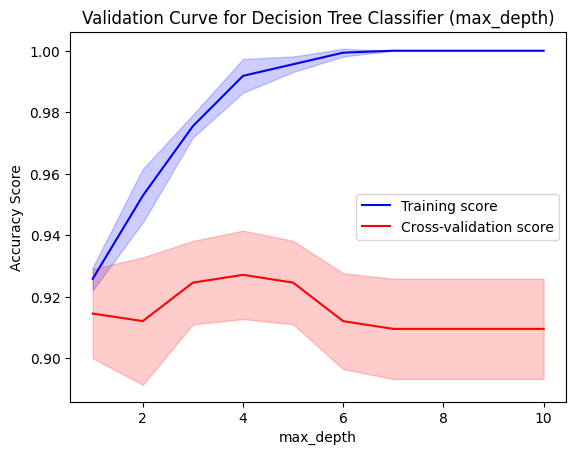

In [52]:
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

plt.title("Validation Curve for Decision Tree Classifier (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

# learning curve

In [53]:
from sklearn.model_selection import learning_curve

In [54]:
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(random_state=42), X_train_scaled, y_train, cv=5,
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
)

In [55]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

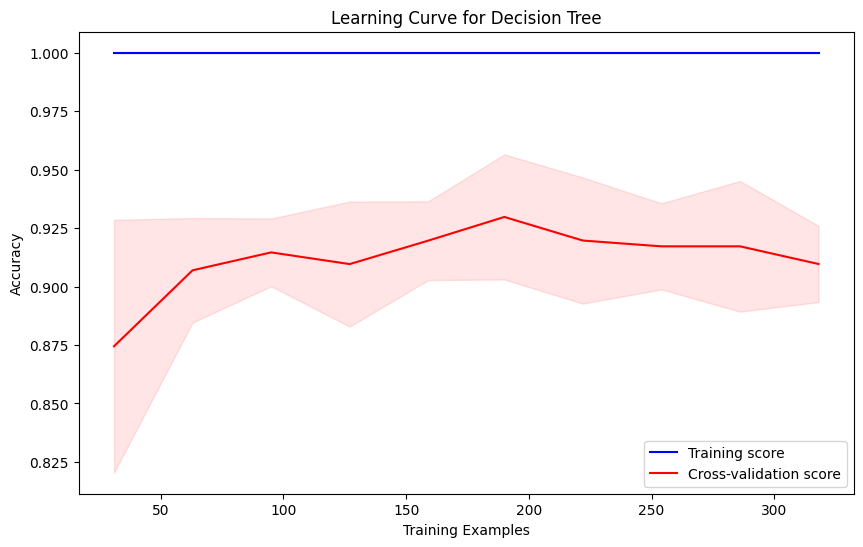

In [56]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="red")
plt.legend(loc="best")
plt.show()

# Confusion Matrix

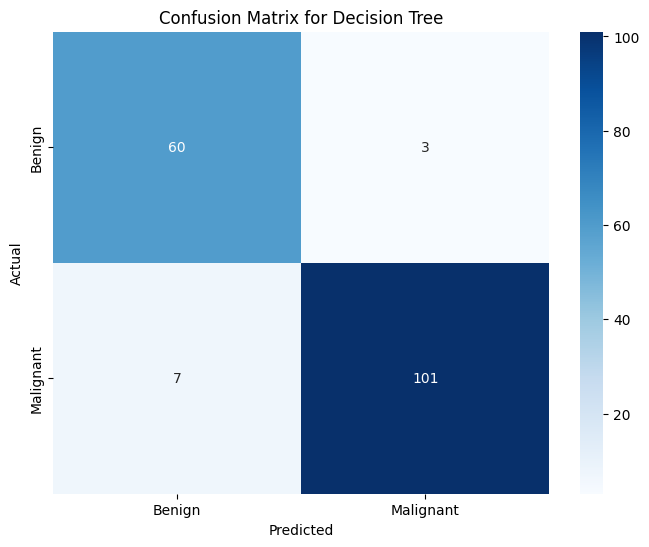

In [57]:
cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# roc & auc

In [58]:
from sklearn.metrics import roc_curve, auc

In [59]:
fpr, tpr, _ = roc_curve(y_test, dt_probabilities)
roc_auc = auc(fpr, tpr)

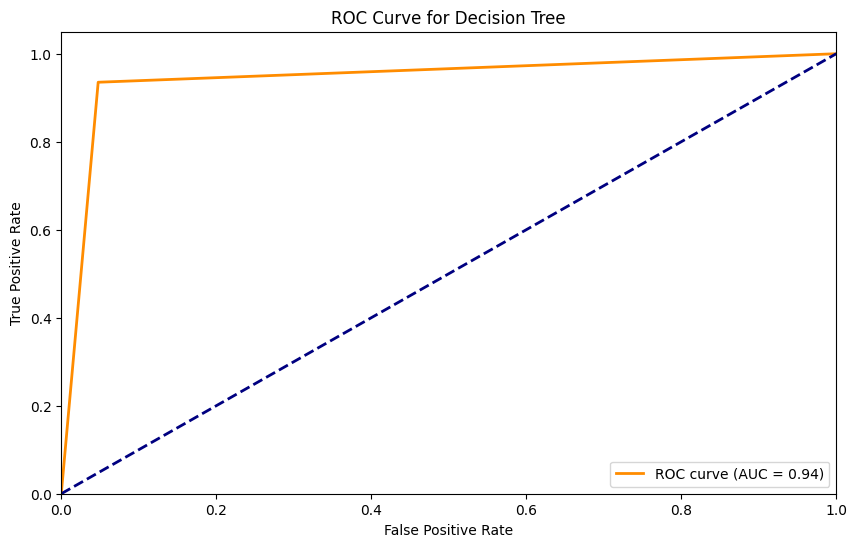

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# precision_recall_curve

In [61]:
from sklearn.metrics import precision_recall_curve

In [62]:
precision, recall, _ = precision_recall_curve(y_test, dt_probabilities)

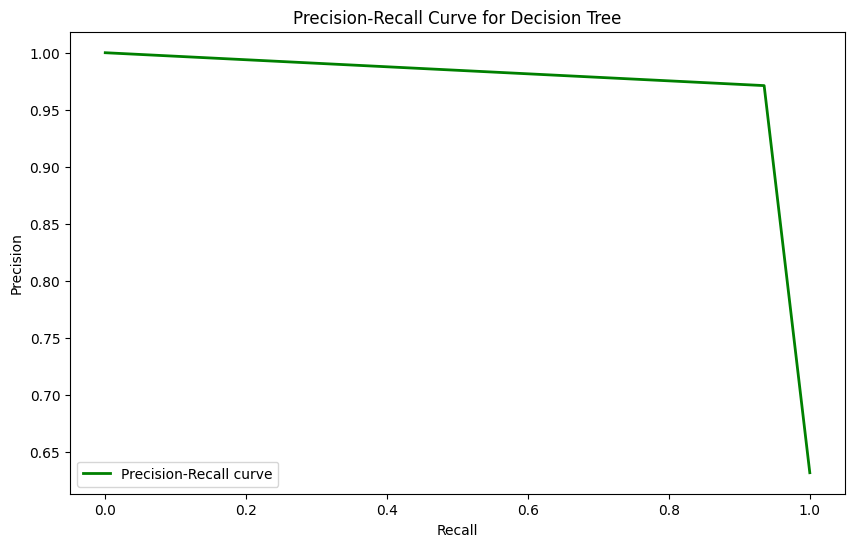

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc="lower left")
plt.show()

# permutation_importance

In [64]:
from sklearn.inspection import permutation_importance

In [65]:
perm_result = permutation_importance(dt_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = perm_result.importances_mean.argsort()

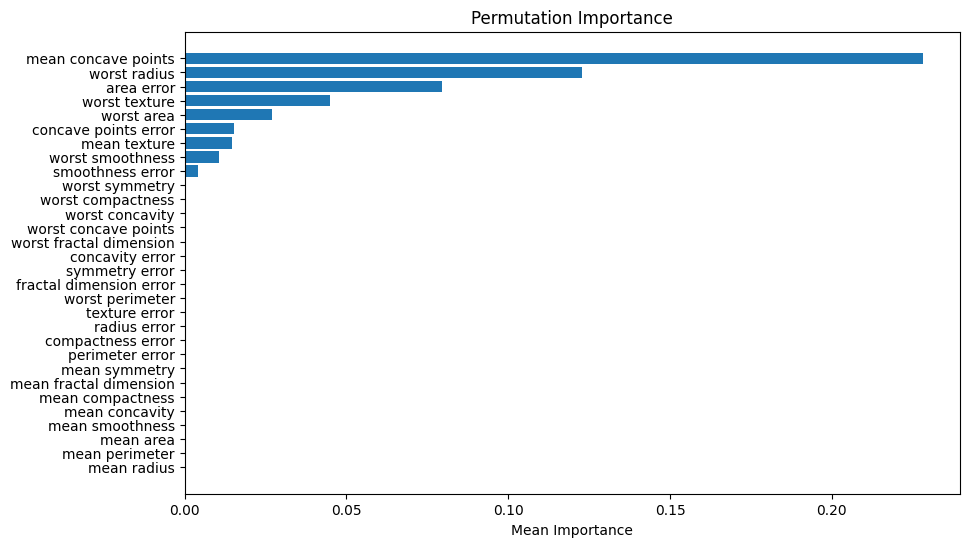

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], perm_result.importances_mean[sorted_idx])
plt.xlabel("Mean Importance")
plt.title("Permutation Importance")
plt.show()

# decision tree visualization

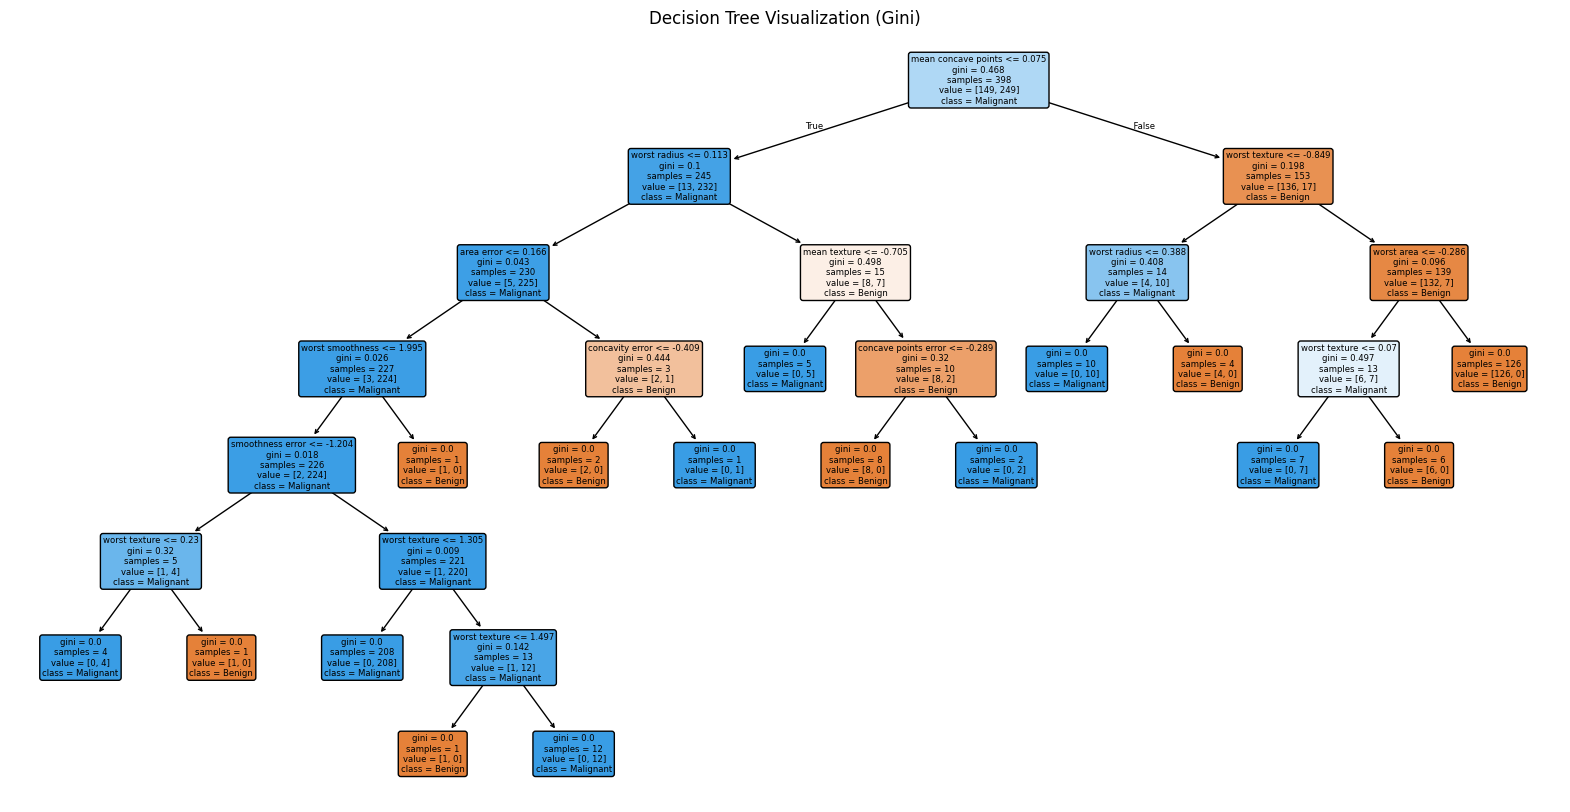

In [67]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model,
               feature_names=feature_names,
               class_names=['Benign', 'Malignant'],
               filled=True,
               rounded=True)
plt.title("Decision Tree Visualization (Gini)")
plt.show()

# feature importance

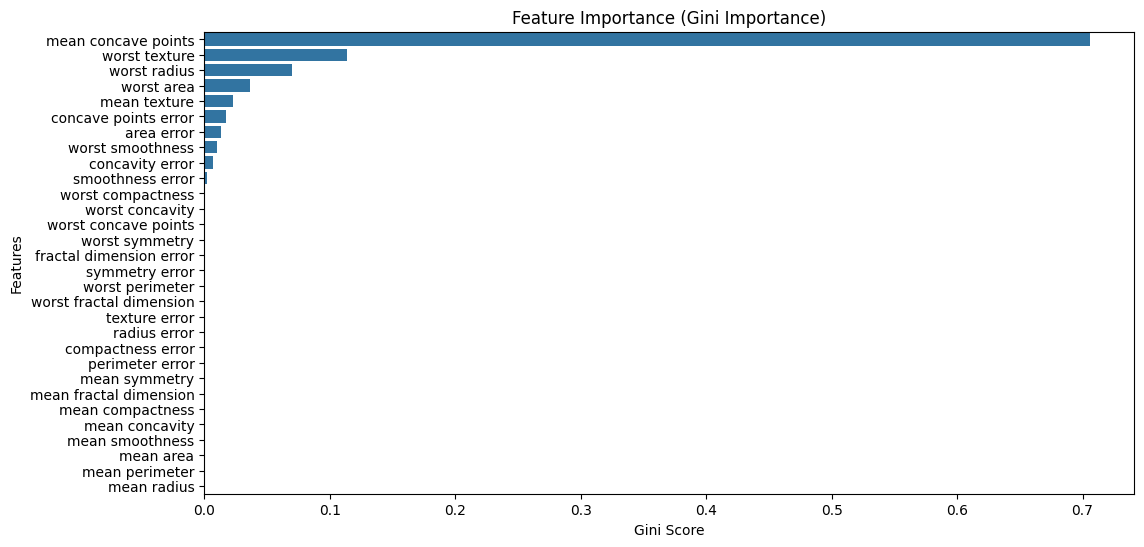

In [68]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importance (Gini Importance)")
plt.xlabel("Gini Score")
plt.ylabel("Features")
plt.show()


#ELI5

In [71]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 5.7 MB/s eta 0:00:00


In [72]:
import eli5
from eli5.sklearn import PermutationImportance

In [73]:
perm = PermutationImportance(dt_model, random_state=1).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names=feature_names.tolist(), top=10)

Weight,Feature
0.2386 ± 0.0239,mean concave points
0.1123 ± 0.0358,worst radius
0.0749 ± 0.0309,area error
0.0444 ± 0.0190,worst texture
0.0339 ± 0.0115,worst area
0.0222 ± 0.0115,concave points error
0.0164 ± 0.0214,worst smoothness
0.0105 ± 0.0115,mean texture
0.0035 ± 0.0094,smoothness error
0 ± 0.0000,worst symmetry


#LIME

In [74]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a7f89d3f97232d1a05685f660108bf872cba76dafee55f42dd6754c1d5550b71
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [75]:
import lime
import lime.lime_tabular

In [76]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, training_labels=y_train,
                                                   feature_names=feature_names,
                                                   class_names=['Benign', 'Malignant'],
                                                   discretize_continuous=True)

In [77]:
i = 5
exp = explainer.explain_instance(X_test_scaled[i], dt_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

#SHAP

In [78]:
import shap

In [79]:
background_data = scaler.transform(shap.sample(X_train, 100))
explainer = shap.TreeExplainer(dt_model)

In [80]:
shap_values = explainer.shap_values(X_test)

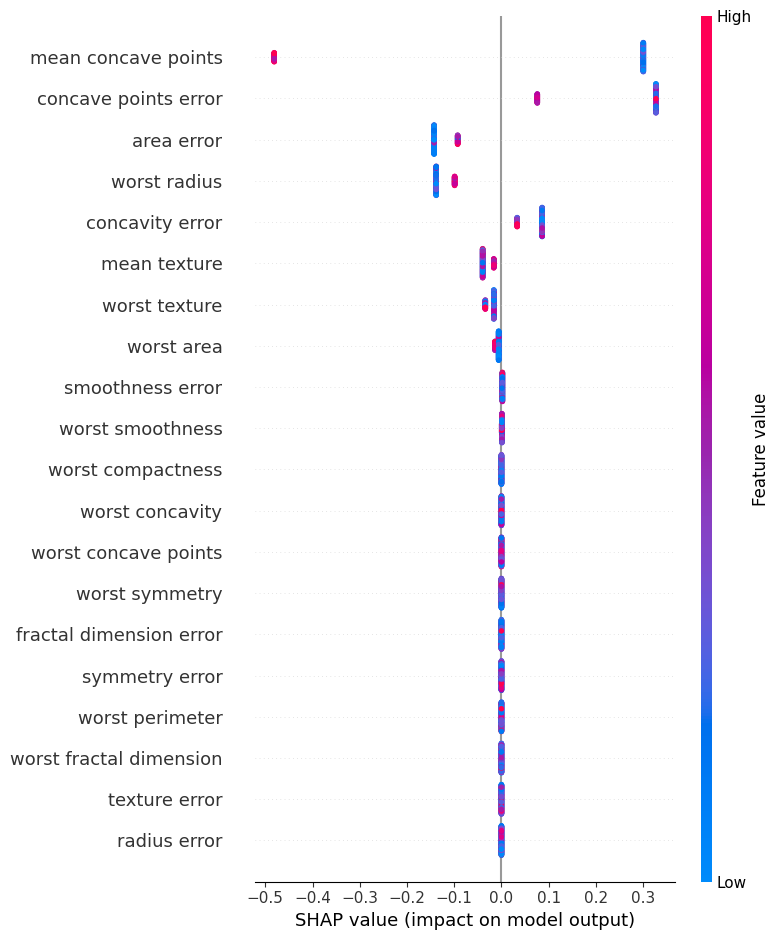

In [81]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=feature_names, show=True)
plt.show()

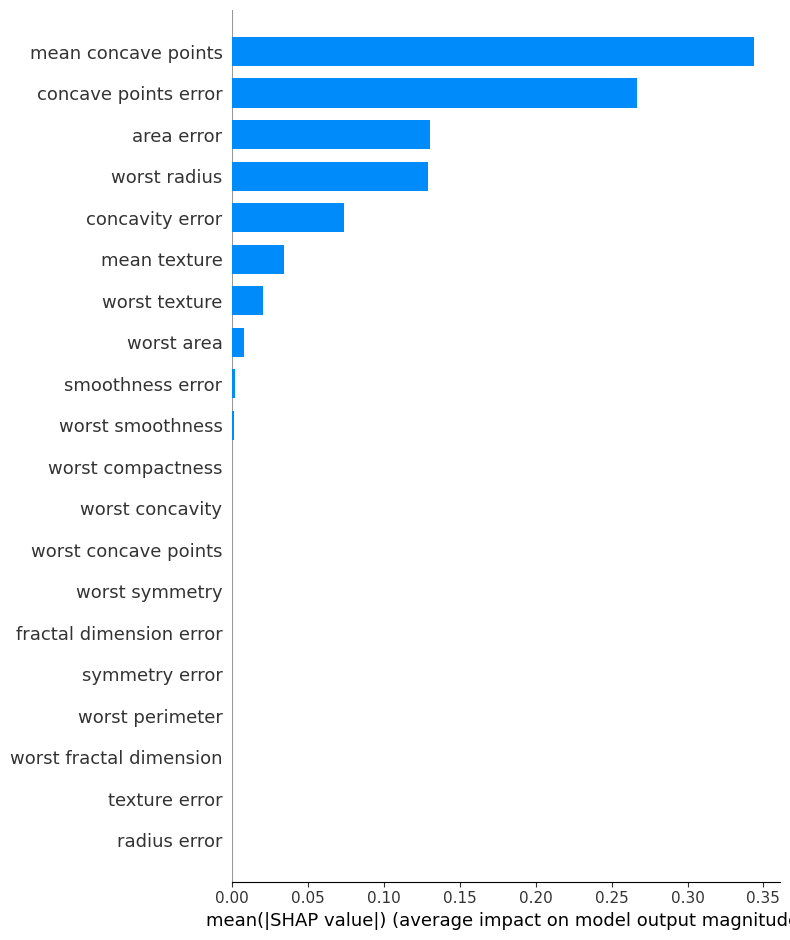

In [82]:
plt.figure()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=feature_names, plot_type="bar", show=True)
plt.close()

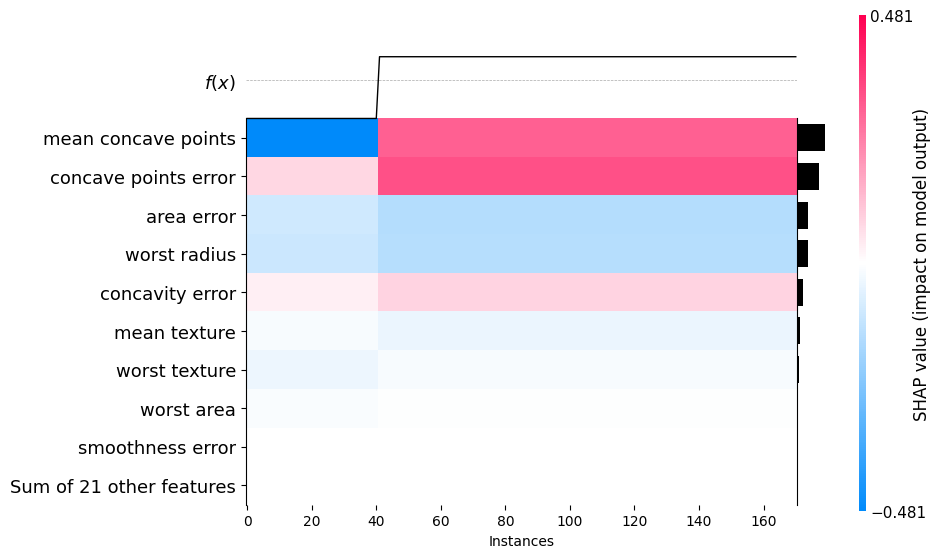

<Axes: xlabel='Instances'>

In [83]:
shap_values_class_1 = shap_values[:, :, 1]

explanation = shap.Explanation(values=shap_values_class_1,
                                 base_values=None,
                                 data=X_test,
                                 feature_names=feature_names)

shap.plots.heatmap(explanation)